In [116]:
import pandas as pd
import numpy as np
import sys
import os



from analyze_src.data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy
from analyze_src.missing_values_analysis import SimpleMissingValuesAnalysis
from analyze_src.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from analyze_src.bivariate_analysis import BivariateAnalyzer, NumericalBivariateAnalysis, CategoricalVsNumericalAnalysis
from analyze_src.multivariate_analysis import MultivariateAnalysis
# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [117]:
# Load the data
# Assuming you have already extracted the data into the 'extracted-data' folder


data_path = '/Users/georgensamuel/Documents/Machine_Learning_Projects/house_price_prediction/extracted_data/AmesHousing.csv'  # Adjust this path as per your directory structure
df = pd.read_csv(data_path)

In [118]:
# Step 1: Basic Data Inspection
# ------------------------------------
# Initialize the Data Inspector with a strategy for Data Types Inspectio

data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)

2025-05-12 22:57:24,439 - INFO - Inspecting data types and non-null counts...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

{'data_types': Order                int64
 PID                  int64
 MS SubClass          int64
 MS Zoning           object
 Lot Frontage       float64
 Lot Area             int64
 Street              object
 Alley               object
 Lot Shape           object
 Land Contour        object
 Utilities           object
 Lot Config          object
 Land Slope          object
 Neighborhood        object
 Condition 1         object
 Condition 2         object
 Bldg Type           object
 House Style         object
 Overall Qual         int64
 Overall Cond         int64
 Year Built           int64
 Year Remod/Add       int64
 Roof Style          object
 Roof Matl           object
 Exterior 1st        object
 Exterior 2nd        object
 Mas Vnr Type        object
 Mas Vnr Area       float64
 Exter Qual          object
 Exter Cond          object
 Foundation          object
 Bsmt Qual           object
 Bsmt Cond           object
 Bsmt Exposure       object
 BsmtFin Type 1      object
 BsmtF

In [119]:
# Switch to Summary Statistics Inspection Strategy
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)

2025-05-12 22:57:24,565 - INFO - Generating summary statistics...


{'numerical_summary':              Order           PID  MS SubClass MS Zoning  Lot Frontage  \
 count   2930.00000  2.930000e+03  2930.000000      2930   2440.000000   
 unique         NaN           NaN          NaN         7           NaN   
 top            NaN           NaN          NaN        RL           NaN   
 freq           NaN           NaN          NaN      2273           NaN   
 mean    1465.50000  7.144645e+08    57.387372       NaN     69.224590   
 std      845.96247  1.887308e+08    42.638025       NaN     23.365335   
 min        1.00000  5.263011e+08    20.000000       NaN     21.000000   
 25%      733.25000  5.284770e+08    20.000000       NaN     58.000000   
 50%     1465.50000  5.354536e+08    50.000000       NaN     68.000000   
 75%     2197.75000  9.071811e+08    70.000000       NaN     80.000000   
 max     2930.00000  1.007100e+09   190.000000       NaN    313.000000   
 
              Lot Area Street Alley Lot Shape Land Contour Utilities  \
 count     2930.0


Missing Values Count by Column:
Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

Visualizing Missing Values...


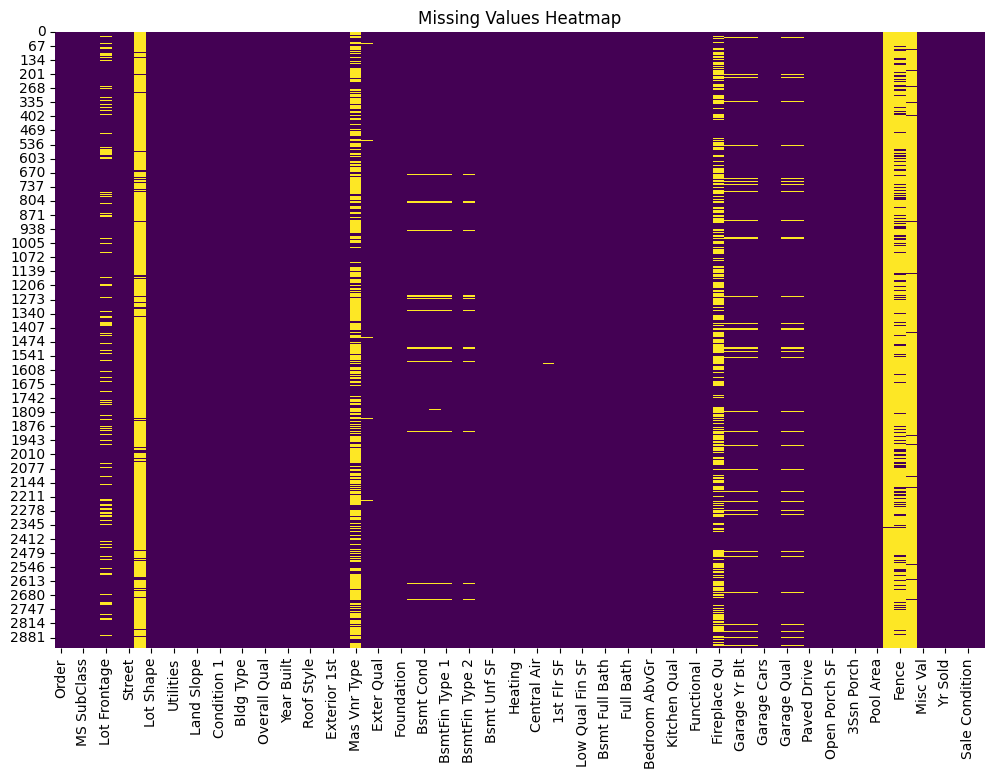

In [120]:
# Step 2: Missing Values Analysis
# ------------------------------------
# Perform a simple missing values analysis
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

# Missing Values Heatmap Insights

#### **1. Colors Represent Missingness:**
- **Yellow**: Represents missing values. The more yellow you see in a column, the more missing data is present in that particular feature.
- **Purple (or dark color)**: Represents non-missing values. Columns that are mostly purple indicate that most of the data is present for that feature.

#### **2. Identifying Columns with Missing Data:**
- Look for columns with significant amounts of yellow. These columns have a higher proportion of missing data.
  - For instance, in your heatmap, columns like `Lot Frontage`, `Mas Vnr Type`, `Mas Vnr Area`, `Garage Yr Blt`, and `Pool Area` have substantial yellow, indicating that these features have missing values.

#### **3. Understanding the Distribution of Missing Data:**
- **Randomly Distributed**: If the yellow marks are scattered without any noticeable pattern, it suggests that the missing data might be randomly distributed.
- **Structured Missingness**: If the yellow is clustered in certain rows or columns, it might indicate a non-random pattern of missingness. For example, entire rows or columns missing could suggest a data collection issue or that these features are not applicable in certain cases.

#### **4. Assessing the Severity:**
- Columns with more yellow indicate a higher proportion of missing values, which might pose a problem for model building. This could lead to biased or inaccurate models if not handled properly.
  - In your heatmap, some columns have little to no missing values, while others have substantial missingness. Decisions will need to be made on whether to impute, drop, or handle these features differently.




# Insights

#### **1. Data Types and Null Value Overview:**

* The dataset includes **2930 records** across **82 attributes**.
* **Data Types**: It contains 11 columns of type `float64`, 28 columns of `int64`, and 43 columns as `object`.

  * **Numerical Columns**: Examples include `Lot Frontage`, `Lot Area`, `Overall Qual`, `Year Built`, etc.
  * **Categorical Columns**: Attributes such as `MS Zoning`, `Street`, `Neighborhood`, and `Bldg Type` fall into this category.

#### **2. Descriptive Statistics:**

* **Numerical Data**:

  * The target variable, `SalePrice`, has an average value of **\$180,796** and a standard deviation of **\$79,886**, highlighting a broad spread in house prices.
  * `Overall Qual` ranges from **1 to 10** with a mean score of **6.09**, suggesting generally good quality across homes.
  * `Year Built` spans from **1872 to 2010**, indicating a mix of historical and newer constructions.
  * `Lot Area` exhibits substantial variation with notable outliers (up to **215,245 sq ft**), implying the presence of exceptionally large plots.
  * The average for `Gr Liv Area` (above-ground living space) is **1499 sq ft**, with significant variability—potentially impacting `SalePrice`.

* **Categorical Data**:

  * The `Neighborhood` field has **28 unique entries**, with `NAmes` appearing most frequently, hinting at its dominance in the dataset.
  * The `MS Zoning` feature is primarily composed of the `RL` category, and contains **7 unique zoning codes** overall.
  * The `Alley` field is sparsely populated (details in the missing values section).
  * Several variables concerning basement condition, garage features, and exterior materials show variability that may be predictive of house prices.

#### **3. Missing Data Overview:**

* **Severe Missingness**:

  * `Alley`: **2732 missing entries** (\~93.4%), which may warrant removal or imputation with a default.
  * `Pool QC`: **2917 missing values** (\~99.5%), indicating pools are rare.
  * `Fence`: **2358 missing entries** (\~80.5%), suggesting most homes don’t have recorded fences.
  * `Misc Feature`: **2824 missing** (\~96.4%), indicating few houses include miscellaneous amenities.

* **Moderately Missing Features**:

  * Features like `Garage Type`, `Garage Yr Blt`, `Garage Finish`, `Garage Qual`, and `Garage Cond` are missing in **159 rows** (\~5.4%), likely reflecting the absence of a garage.
  * Basement-related features such as `Bsmt Qual`, `Bsmt Cond`, `Bsmt Exposure`, `BsmtFin Type 1`, and `BsmtFin Type 2` have \~80 missing records (\~2.7%), indicating no basement in those cases.
  * `Mas Vnr Type` has **1775 missing values** (\~60.6%), while `Mas Vnr Area` is missing in **23 rows**, hinting that masonry veneers may not be common.

* **Minimal Missingness**:

  * Several columns like `BsmtFin SF 1`, `Total Bsmt SF`, `Electrical`, `Garage Cars`, and `Garage Area` are missing in only one or two rows—these can likely be addressed easily through imputation.

### **Areas for Future Focus**

1. **Missing Data Strategy**:

   * **Heavily Affected Columns**: For features like `Alley`, `Pool QC`, `Fence`, and `Misc Feature`, consider:

     * Dropping them if their contribution is negligible.
     * Filling them with meaningful placeholders like "None" or "No Pool" to retain them.
   * **Moderate Missingness**: For basement and garage fields, categorical nulls can be filled with labels like "No Basement" and "No Garage", while numeric nulls can be replaced with zero.
   * **Minimal Missingness**: These can be addressed via standard imputation techniques—mean for numeric, mode for categorical.

2. **Outliers and Skewness**:

   * Attributes like `Lot Area`, `Gr Liv Area`, and `SalePrice` show high dispersion. Identifying and addressing these outliers will be important to prevent them from distorting model outcomes.

3. **Encoding Categorical Data**:

   * High-cardinality variables such as `Neighborhood`, `MS Zoning`, `Bldg Type`, and `Exterior 1st` require thoughtful encoding—options include one-hot, label, or frequency encoding depending on their influence on the target.

4. **Feature Engineering Opportunities**:

   * Based on current insights, new features may be derived by combining or transforming existing ones to better capture the underlying relationships.

5. **Correlation and Multicollinearity**:

   * Preliminary correlation checks reveal that certain features, especially those related to basement metrics, may be strongly correlated. This may cause multicollinearity, which must be mitigated during feature selection or model training.

---

Let me know if you'd like this converted into a downloadable markdown or Jupyter notebook cell format.


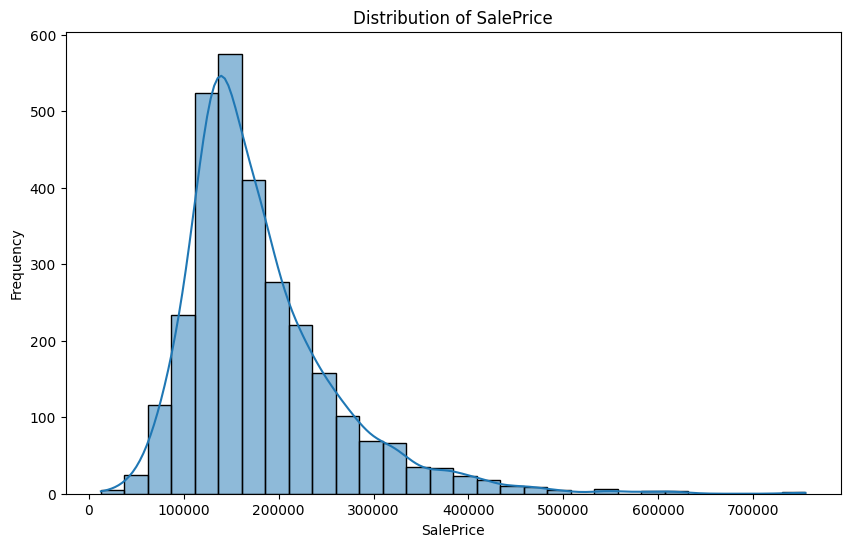

In [121]:
# Step 3: Univariate Analysis
# -----------------------------------
# Analyzing a Numerical Feature
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'SalePrice')

/Users/georgensamuel/Documents/Machine_Learning_Projects/house_price_prediction/analyze_src/univariate_analysis.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


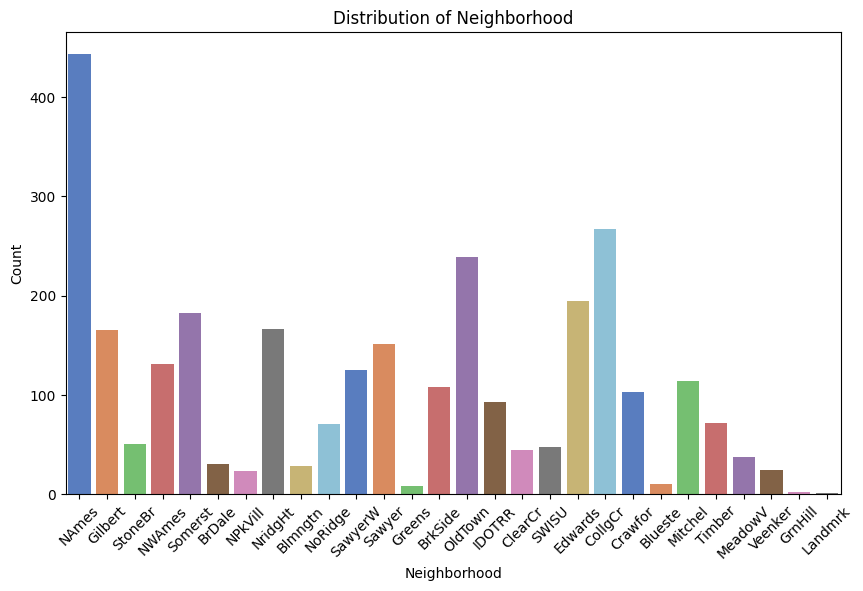

In [122]:
# Analyzing a Categorical Feature
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'Neighborhood') # type: ignore


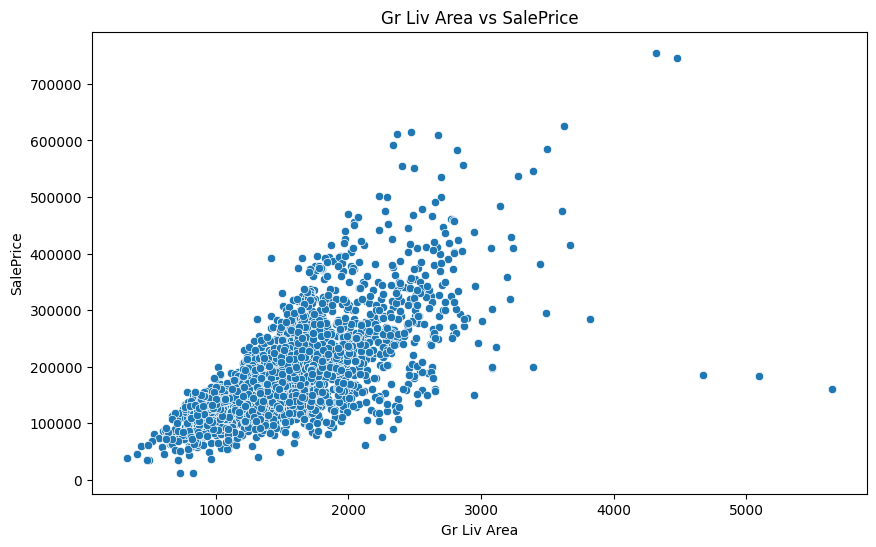

In [123]:
# Step 4: Bivariate Analysis
# -----------------------------------
# Analyzing the Relationship Between Two Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalBivariateAnalysis())
bivariate_analyzer.execute_analysis(df, 'Gr Liv Area', 'SalePrice')


2025-05-12 22:57:28,417 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-12 22:57:28,443 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


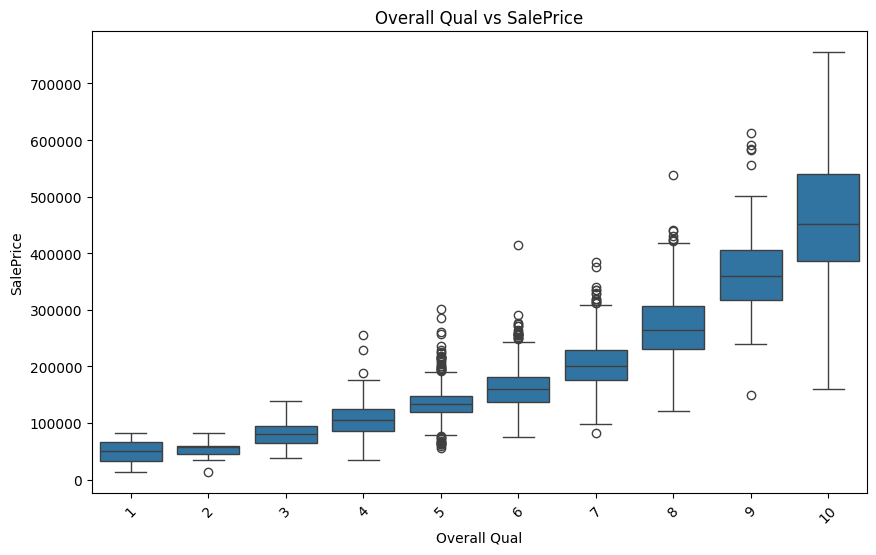

In [124]:
# Analyzing the Relationship Between a Categorical and a Numerical Feature
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'Overall Qual', 'SalePrice')

### **Insights from Univariate and Bivariate Analysis**

#### **Step 3: Univariate Analysis**

1. **SalePrice Distribution (Numerical Feature)**:
   - **Insight**: The distribution of `SalePrice` is positively skewed, with the majority of house prices falling between $100,000 and $250,000. The peak frequency is around the $200,000 mark.
   - **Implication**: This skewness suggests that most homes in the dataset are relatively affordable, with fewer high-end properties. The long tail on the right side indicates a small number of more expensive homes, which may need special consideration during modeling (e.g., applying a log transformation to normalize the distribution).

2. **Neighborhood Distribution (Categorical Feature)**:
   - **Insight**: The `Neighborhood` feature shows a varied distribution, with `NAmes` being the most common neighborhood, followed by `CollgCr` and `OldTown`. Some neighborhoods have very few observations.
   - **Implication**: The high frequency of certain neighborhoods suggests that these areas could significantly influence overall housing prices. Neighborhoods with fewer observations might require careful handling to avoid overfitting during model training, potentially using techniques like frequency encoding or grouping similar neighborhoods together.

#### **Step 4: Bivariate Analysis**

1. **Gr Liv Area vs. SalePrice (Numerical vs. Numerical)**:
   - **Insight**: There is a strong positive correlation between `Gr Liv Area` (Above Ground Living Area) and `SalePrice`, indicating that larger homes generally sell for higher prices. The relationship appears mostly linear, but there are a few outliers, especially at higher `Gr Liv Area` values.
   - **Implication**: This linear relationship confirms that `Gr Liv Area` is likely a strong predictor of `SalePrice`. However, the presence of outliers (large homes with lower than expected prices) might require further investigation to determine whether they should be treated or removed.

2. **Overall Qual vs. SalePrice (Categorical vs. Numerical)**:
   - **Insight**: There is a clear positive relationship between `Overall Qual` (Overall Quality) and `SalePrice`, with higher quality ratings associated with significantly higher prices. The box plot shows increasing medians and ranges as quality improves, with some variability in each category.
   - **Implication**: `Overall Qual` is another strong predictor of `SalePrice`. The consistent increase in sale price with higher quality ratings suggests that homebuyers highly value quality. The variability within each category might be due to other factors influencing price, such as location or specific features not captured by `Overall Qual`.

### **Summary**:
- **Key Predictors**: Both `Gr Liv Area` and `Overall Qual` are strong predictors of `SalePrice`. These features should be emphasized in any predictive models.
- **Data Distribution**: The positive skew in `SalePrice` and the wide range of values for both `Gr Liv Area` and `Overall Qual` indicate the need for careful data preprocessing, including potential normalization or transformation of features.
- **Outliers**: Outliers in the relationship between `Gr Liv Area` and `SalePrice` need to be examined closely, as they may represent special cases (e.g., luxury homes) that could skew the model if not properly addressed.

In [125]:


class SimpleMultivariateAnalysis(MultivariateAnalysis):
    def generate_pairplot(self, df):
        sns.pairplot(df)

    def generate_correlation_heatmap(self, df):
        plt.figure(figsize=(10, 8))
        sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
        plt.title('Correlation Heatmap')
        plt.show()


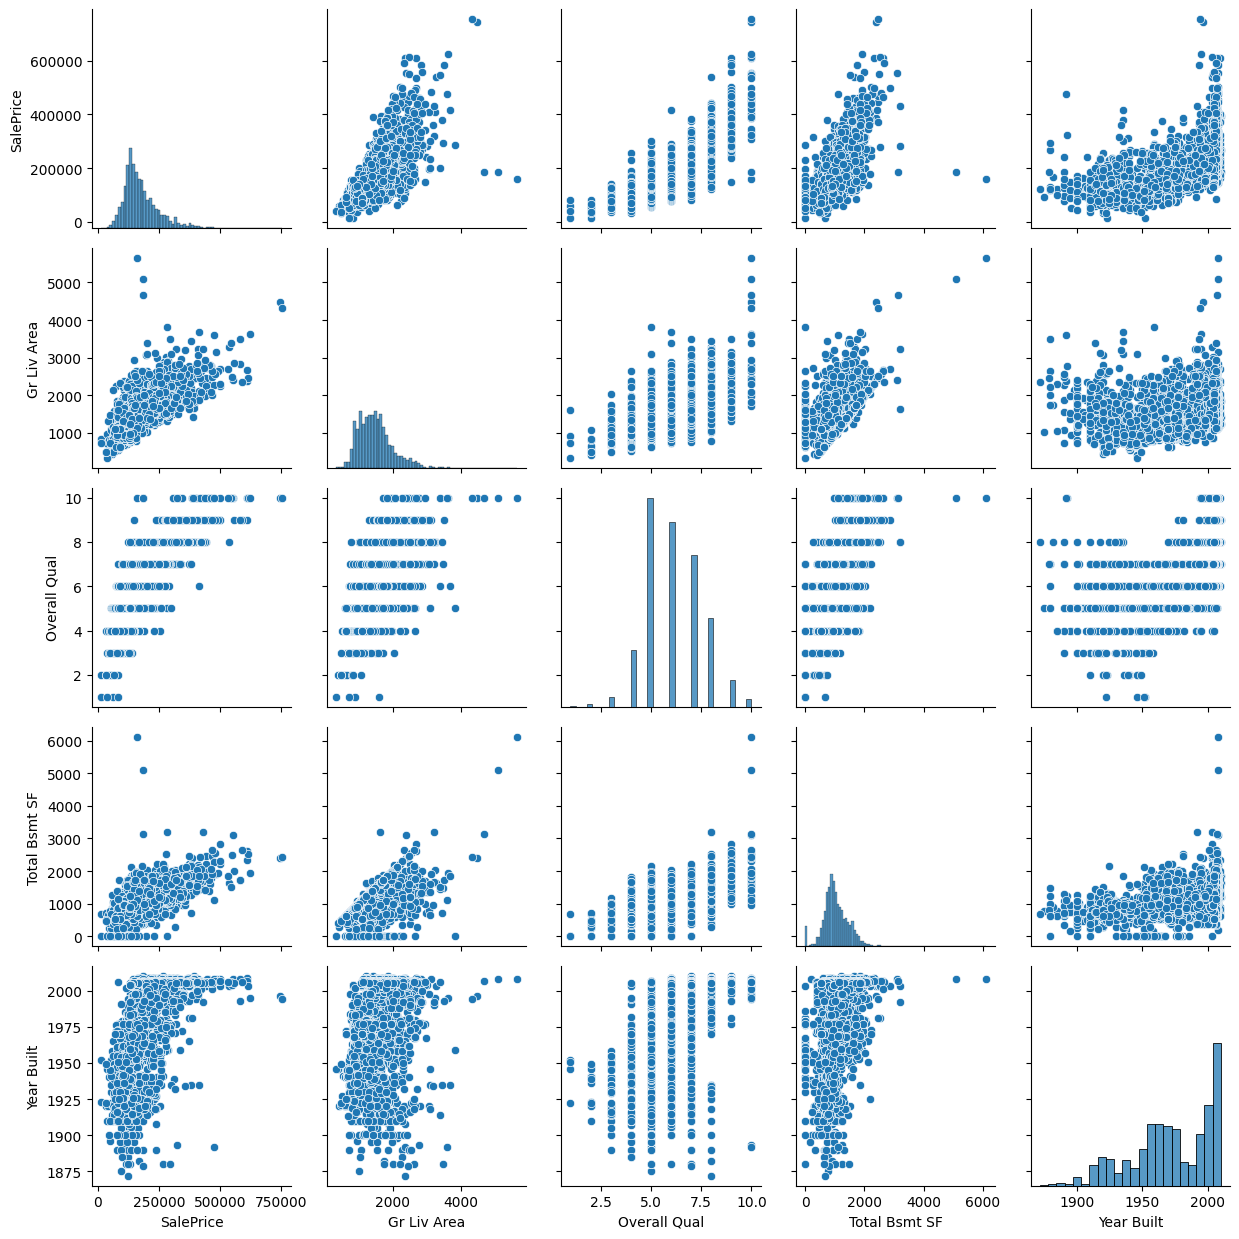

In [126]:
# Instantiate concrete subclass
multivariate_analyzer = PairplotAnalysis()

# Select features
selected_features = ['SalePrice', 'Gr Liv Area', 'Overall Qual', 'Total Bsmt SF', 'Year Built']

# Generate the pairplot
multivariate_analyzer.generate_pairplot(df, selected_features)


### **Insights from Multivariate Analysis**

#### **Correlation Heatmap:**
1. **SalePrice and Overall Qual**:
   - **Insight**: The highest correlation observed is between `SalePrice` and `Overall Qual` (0.80). This strong positive correlation indicates that the overall quality of the house is a significant determinant of its price. 
   - **Implication**: `Overall Qual` should be considered a key predictor in the model. The high correlation suggests that this feature explains a substantial portion of the variance in house prices.

2. **SalePrice and Gr Liv Area**:
   - **Insight**: The correlation between `SalePrice` and `Gr Liv Area` (0.71) is also strong, indicating that larger homes generally have higher sale prices.
   - **Implication**: Similar to `Overall Qual`, `Gr Liv Area` is another critical predictor of `SalePrice`. This relationship aligns with the expectation that more living space increases a property's value.

3. **Total Bsmt SF**:
   - **Insight**: The correlation between `Total Bsmt SF` and `SalePrice` (0.63) is moderate, suggesting that the size of the basement contributes to the overall value but not as strongly as living area or quality.
   - **Implication**: `Total Bsmt SF` is an important feature, but it may require further exploration or interaction with other features to capture its full effect.

4. **Year Built**:
   - **Insight**: `Year Built` has a lower correlation with `SalePrice` (0.56). While newer homes tend to sell for more, this relationship is less pronounced than those with living area or quality.
   - **Implication**: The age of the house is a relevant factor but might be more meaningful when combined with other features like `Overall Qual` or `Remod/Add Year`.

#### **Pair Plot:**
1. **Linear Relationships**:
   - **Insight**: The pair plots confirm linear relationships between `SalePrice` and both `Gr Liv Area` and `Total Bsmt SF`, supporting their inclusion as linear predictors in the model.
   - **Implication**: These linear relationships suggest that linear models (or transformations) could effectively capture these predictors' contributions to `SalePrice`.

2. **Discrete Distribution of Overall Qual**:
   - **Insight**: `Overall Qual` appears as a discrete variable in the pair plots, with significant gaps between categories. This suggests that it is more ordinal in nature.
   - **Implication**: Given its ordinal nature, `Overall Qual` might be better treated as a categorical variable with ordered categories. This could improve the interpretability and performance of the model.

3. **Potential Multicollinearity**:
   - **Insight**: The strong correlations between `Gr Liv Area`, `Overall Qual`, and `Total Bsmt SF` suggest potential multicollinearity, which could inflate variance in model coefficients.
   - **Implication**: Multicollinearity should be checked using Variance Inflation Factor (VIF) analysis. If multicollinearity is confirmed, techniques like feature selection, regularization, or Principal Component Analysis (PCA) might be needed.

### **Issues to Address:**
1. **Multicollinearity**:
   - **Issue**: The high correlations between key predictors could lead to multicollinearity in regression models, which could skew the results and reduce model interpretability.
   - **Action**: Conduct VIF analysis to check for multicollinearity. If detected, consider removing or combining correlated features, using regularization techniques, or applying PCA to reduce dimensionality.

2. **Feature Engineering**:
   - **Issue**: Features like `Overall Qual`, which is ordinal, might benefit from specific treatment (e.g., encoding as an ordinal variable) rather than being treated as continuous.
   - **Action**: Consider encoding `Overall Qual` as an ordinal variable. Also, explore interactions between features like `Gr Liv Area` and `Total Bsmt SF` to capture more complex relationships.

3. **Outliers**:
   - **Issue**: The pair plots indicate potential outliers, especially in `Gr Liv Area` and `SalePrice`. These could be high-leverage points that unduly influence model performance.
   - **Action**: Identify and analyze outliers to determine if they should be removed or if the model should be adjusted to account for them (e.g., using robust regression techniques).